Oppgave 1

In [147]:
library(dplyr)

In [148]:
library(ggplot2)

In [149]:
library(tidyverse)

In [150]:
library(jsonlite)

In [151]:
library(ggrepel)

laste inn json dataen som var i sidekilden 

In [152]:
json <- "https://static01.nyt.com/newsgraphics/2021/12/20/us-coronavirus-deaths-2021/ff0adde21623e111d8ce103fedecf7ffc7906264/scatter.json"

In [153]:
df <- fromJSON(json)

In [154]:
covid <- df

In [155]:
head(covid)

,name,geoid,deaths_before,deaths,deaths_per_100k,fully_vaccinated_pct_of_pop
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,Alabama,USA-01,10790,5590,13.847068,0.4728
2,Alaska,USA-02,318,634,10.526222,0.5602
3,Arizona,USA-04,17153,6663,11.118323,0.5657
4,Arkansas,USA-05,5699,3308,13.313700,0.5091
5,California,USA-06,61034,15117,4.646848,0.6563
6,Colorado,USA-08,6337,3906,8.238144,0.6574


her lager jeg en kolonne med forkortelse på statene som jeg bruker senere, og ganger fully_vaccinated_pct_of_pop med 100 for at det skal gå fra 0 til 100 og ikke 0 til 1.

In [156]:
covid <- covid %>%
  mutate(short_name = abbreviate(covid$name, minlength=3)) %>%
  mutate(fully_vaccinated = fully_vaccinated_pct_of_pop*100)

In [157]:
head(covid)

,name,geoid,deaths_before,deaths,deaths_per_100k,fully_vaccinated_pct_of_pop,short_name,fully_vaccinated
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,Alabama,USA-01,10790,5590,13.847068,0.4728,Alb,47.28
2,Alaska,USA-02,318,634,10.526222,0.5602,Als,56.02
3,Arizona,USA-04,17153,6663,11.118323,0.5657,Arz,56.57
4,Arkansas,USA-05,5699,3308,13.313700,0.5091,Ark,50.91
5,California,USA-06,61034,15117,4.646848,0.6563,Clf,65.63
6,Colorado,USA-08,6337,3906,8.238144,0.6574,Clr,65.74


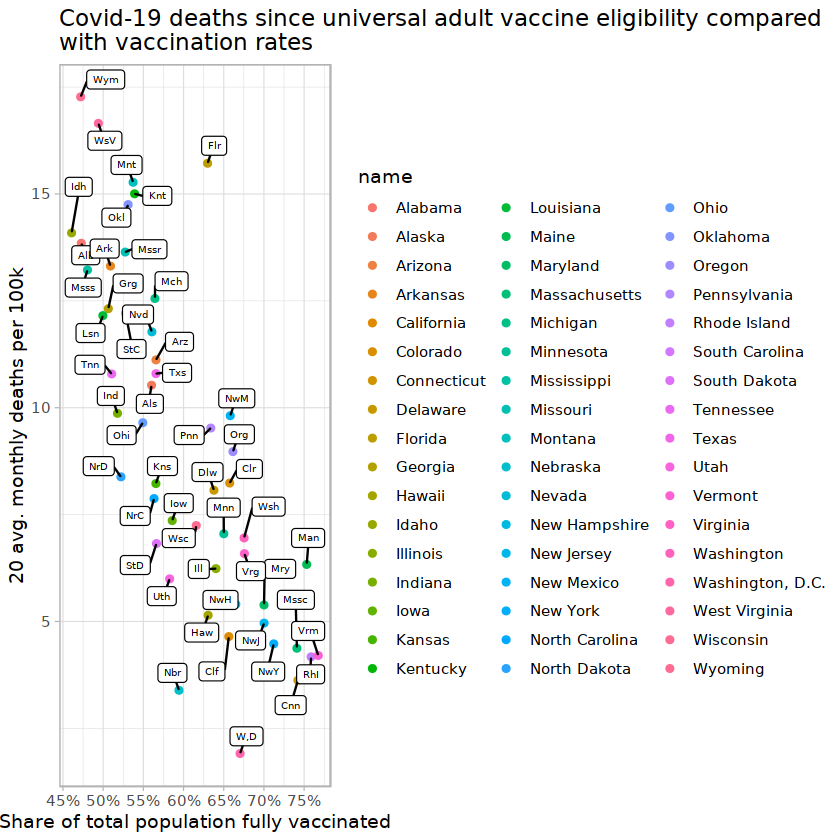

In [165]:
ggplot(data = covid,
       mapping = aes(x = fully_vaccinated,
                     y = deaths_per_100k,
                    label = short_name))+
geom_point(aes(colour = name))+
geom_label_repel(min.segment.length = 0, max.overlaps = Inf, size = 2)+
scale_x_continuous(breaks = c(45, 50, 55, 60, 65, 70, 75, 80), 
                   labels = function(x) paste0(x, "%"))+
labs(x = "Share of total population fully vaccinated",
     y= "20 avg. monthly deaths per 100k",
     title = "Covid-19 deaths since universal adult vaccine eligibility compared
with vaccination rates")+
theme_light()